In [2]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Read in data, To read in data post-cleaning and save time, SCROLL DOWN
yelp = pd.read_csv("../yelp_academic_dataset_business.csv",
                  dtype={'attributes': str, 'postal_code': str}, low_memory=False)
# Reorder columns
# https://stackoverflow.com/questions/41968732/set-order-of-columns-in-pandas-dataframe
cols_to_order = ['name', 'stars', 'review_count', 'categories', 'city', 'state', 
                 'postal_code', 'latitude', 'longitude', 'address']
new_cols = cols_to_order + (yelp.columns.drop(cols_to_order).tolist())
yelp = yelp[new_cols]

In [ ]:
print(yelp.shape)
print(yelp.info())

In [ ]:
# Remove entries with null in columns: name, categories, city, postal code
yelp = yelp[(pd.isna(yelp['name'])==False) & 
           (pd.isna(yelp['city'])==False) & 
           (pd.isna(yelp['categories'])==False) & 
           (pd.isna(yelp['postal_code'])==False)]
print(yelp.shape)

In [ ]:
# Remove columns with <0.5% non-null values (<894) except BYOB=641 non-null
# and non-relevant columns
#https://stackoverflow.com/questions/13411544/delete-a-column-from-a-pandas-dataframe
yelp = yelp.drop(yelp.columns[[6,9,17,26,31,33,34,37,38]], axis=1)
print(yelp.shape)

In [ ]:
# Remove entries with < 1000 businesses in each state
# https://stackoverflow.com/questions/49735683/python-removing-rows-on-count-condition
state_counts = yelp['state'].value_counts()
yelp = yelp[~yelp['state'].isin(state_counts[state_counts < 1000].index)]
print(yelp.shape)

In [ ]:
# Create new column of grouped star rating
conds = [
    ((yelp['stars'] == 1) | (yelp['stars'] == 1.5)),
    ((yelp['stars'] == 2) | (yelp['stars'] == 2.5)),
    ((yelp['stars'] == 3) | (yelp['stars'] == 3.5)),
    ((yelp['stars'] == 4) | (yelp['stars'] == 4.5)),
    (yelp['stars'] == 5)
]
values = [1, 2, 3, 4, 5]
yelp['star-rating'] = np.select(conds, values)
print(yelp.shape)

In [ ]:
# Convert 'hours' columns to total hours open that day for each day column
from datetime import timedelta, time
# Monday ---------------------------------------------------------
yelp[['hours.Monday.start', 'hours.Monday.end']] = yelp['hours.Monday'].str.split('-', 1, expand=True)
# Monday start time
hr_min = []
for row in yelp['hours.Monday.start']:
    hr_min.append(str(row).split(':'))
new_el = []
for el in hr_min:
    if len(el) == 1:
        new_el.append([0,0])
    else:
        new_el.append([int(i) for i in el]) #change elements in list to int
time_obj = []
for el_split in new_el:
    time_obj.append(timedelta(hours=el_split[0], minutes=el_split[1]))
yelp['hours.Monday.start'] = time_obj
# Monday end time
hr_min = []
for row in yelp['hours.Monday.end']:
    hr_min.append(str(row).split(':'))
new_el = []
for el in hr_min:
    if len(el) == 1:
        new_el.append([0,0])
    else:
        new_el.append([int(i) for i in el])
time_obj = []
for el_split in new_el:
    time_obj.append(timedelta(hours=el_split[0], minutes=el_split[1]))
yelp['hours.Monday.end'] = time_obj
# Create column of time difference
yelp['Monday.hrs.open'] = yelp['hours.Monday.end'] - yelp['hours.Monday.start']
# Convert seconds to minutes
hour_calc = []
for ob in yelp['Monday.hrs.open']:
    hour_calc.append(ob.seconds//3600) #convert seconds to hours for explainability
yelp['Monday.hrs.open'] = hour_calc
# Tuesday -------------------------------------------------------------
yelp[['hours.Tuesday.start', 'hours.Tuesday.end']] = yelp['hours.Tuesday'].str.split('-', 1, expand=True)
hr_min = []
for row in yelp['hours.Tuesday.start']:
    hr_min.append(str(row).split(':'))
new_el = []
for el in hr_min:
    if len(el) == 1:
        new_el.append([0,0])
    else:
        new_el.append([int(i) for i in el])
time_obj = []
for el_split in new_el:
    time_obj.append(timedelta(hours=el_split[0], minutes=el_split[1]))
yelp['hours.Tuesday.start'] = time_obj
hr_min = []
for row in yelp['hours.Tuesday.end']:
    hr_min.append(str(row).split(':'))
new_el = []
for el in hr_min:
    if len(el) == 1:
        new_el.append([0,0])
    else:
        new_el.append([int(i) for i in el])
time_obj = []
for el_split in new_el:
    time_obj.append(timedelta(hours=el_split[0], minutes=el_split[1]))
yelp['hours.Tuesday.end'] = time_obj
yelp['Tuesday.hrs.open'] = yelp['hours.Tuesday.end'] - yelp['hours.Tuesday.start']
hour_calc = []
for ob in yelp['Tuesday.hrs.open']:
    hour_calc.append(ob.seconds//3600)
yelp['Tuesday.hrs.open'] = hour_calc
# Wednesday ---------------------------------------------------------
yelp[['hours.Wednesday.start', 'hours.Wednesday.end']] = yelp['hours.Wednesday'].str.split('-', 1, expand=True)
hr_min = []
for row in yelp['hours.Wednesday.start']:
    hr_min.append(str(row).split(':'))
new_el = []
for el in hr_min:
    if len(el) == 1:
        new_el.append([0,0])
    else:
        new_el.append([int(i) for i in el])
time_obj = []
for el_split in new_el:
    time_obj.append(timedelta(hours=el_split[0], minutes=el_split[1]))
yelp['hours.Wednesday.start'] = time_obj
hr_min = []
for row in yelp['hours.Wednesday.end']:
    hr_min.append(str(row).split(':'))
new_el = []
for el in hr_min:
    if len(el) == 1:
        new_el.append([0,0])
    else:
        new_el.append([int(i) for i in el])
time_obj = []
for el_split in new_el:
    time_obj.append(timedelta(hours=el_split[0], minutes=el_split[1]))
yelp['hours.Wednesday.end'] = time_obj
yelp['Wednesday.hrs.open'] = yelp['hours.Wednesday.end'] - yelp['hours.Wednesday.start']
hour_calc = []
for ob in yelp['Wednesday.hrs.open']:
    hour_calc.append(ob.seconds//3600)
yelp['Wednesday.hrs.open'] = hour_calc
# Thursday --------------------------------------------------------------------
yelp[['hours.Thursday.start', 'hours.Thursday.end']] = yelp['hours.Thursday'].str.split('-', 1, expand=True)
hr_min = []
for row in yelp['hours.Thursday.start']:
    hr_min.append(str(row).split(':'))
new_el = []
for el in hr_min:
    if len(el) == 1:
        new_el.append([0,0])
    else:
        new_el.append([int(i) for i in el])
time_obj = []
for el_split in new_el:
    time_obj.append(timedelta(hours=el_split[0], minutes=el_split[1]))
yelp['hours.Thursday.start'] = time_obj
hr_min = []
for row in yelp['hours.Thursday.end']:
    hr_min.append(str(row).split(':'))
new_el = []
for el in hr_min:
    if len(el) == 1:
        new_el.append([0,0])
    else:
        new_el.append([int(i) for i in el])
time_obj = []
for el_split in new_el:
    time_obj.append(timedelta(hours=el_split[0], minutes=el_split[1]))
yelp['hours.Thursday.end'] = time_obj
yelp['Thursday.hrs.open'] = yelp['hours.Thursday.end'] - yelp['hours.Thursday.start']
hour_calc = []
for ob in yelp['Thursday.hrs.open']:
    hour_calc.append(ob.seconds//3600)
yelp['Thursday.hrs.open'] = hour_calc
# Friday -----------------------------------------------------------------------
yelp[['hours.Friday.start', 'hours.Friday.end']] = yelp['hours.Friday'].str.split('-', 1, expand=True)
hr_min = []
for row in yelp['hours.Friday.start']:
    hr_min.append(str(row).split(':'))
new_el = []
for el in hr_min:
    if len(el) == 1:
        new_el.append([0,0])
    else:
        new_el.append([int(i) for i in el])
time_obj = []
for el_split in new_el:
    time_obj.append(timedelta(hours=el_split[0], minutes=el_split[1]))
yelp['hours.Friday.start'] = time_obj
hr_min = []
for row in yelp['hours.Friday.end']:
    hr_min.append(str(row).split(':'))
new_el = []
for el in hr_min:
    if len(el) == 1:
        new_el.append([0,0])
    else:
        new_el.append([int(i) for i in el])
time_obj = []
for el_split in new_el:
    time_obj.append(timedelta(hours=el_split[0], minutes=el_split[1]))
yelp['hours.Friday.end'] = time_obj
yelp['Friday.hrs.open'] = yelp['hours.Friday.end'] - yelp['hours.Friday.start']
hour_calc = []
for ob in yelp['Friday.hrs.open']:
    hour_calc.append(ob.seconds//3600)
yelp['Friday.hrs.open'] = hour_calc
# Saturday ------------------------------------------------------------------------
yelp[['hours.Saturday.start', 'hours.Saturday.end']] = yelp['hours.Saturday'].str.split('-', 1, expand=True)
hr_min = []
for row in yelp['hours.Saturday.start']:
    hr_min.append(str(row).split(':'))
new_el = []
for el in hr_min:
    if len(el) == 1:
        new_el.append([0,0])
    else:
        new_el.append([int(i) for i in el])
time_obj = []
for el_split in new_el:
    time_obj.append(timedelta(hours=el_split[0], minutes=el_split[1]))
yelp['hours.Saturday.start'] = time_obj
hr_min = []
for row in yelp['hours.Saturday.end']:
    hr_min.append(str(row).split(':'))
new_el = []
for el in hr_min:
    if len(el) == 1:
        new_el.append([0,0])
    else:
        new_el.append([int(i) for i in el])
time_obj = []
for el_split in new_el:
    time_obj.append(timedelta(hours=el_split[0], minutes=el_split[1]))
yelp['hours.Saturday.end'] = time_obj
yelp['Saturday.hrs.open'] = yelp['hours.Saturday.end'] - yelp['hours.Saturday.start']
hour_calc = []
for ob in yelp['Saturday.hrs.open']:
    hour_calc.append(ob.seconds//3600)
yelp['Saturday.hrs.open'] = hour_calc
# Sunday ----------------------------------------------------------------------
yelp[['hours.Sunday.start', 'hours.Sunday.end']] = yelp['hours.Sunday'].str.split('-', 1, expand=True)
hr_min = []
for row in yelp['hours.Sunday.start']:
    hr_min.append(str(row).split(':'))
new_el = []
for el in hr_min:
    if len(el) == 1:
        new_el.append([0,0])
    else:
        new_el.append([int(i) for i in el])
time_obj = []
for el_split in new_el:
    time_obj.append(timedelta(hours=el_split[0], minutes=el_split[1]))
yelp['hours.Sunday.start'] = time_obj
hr_min = []
for row in yelp['hours.Sunday.end']:
    hr_min.append(str(row).split(':'))
new_el = []
for el in hr_min:
    if len(el) == 1:
        new_el.append([0,0])
    else:
        new_el.append([int(i) for i in el])
time_obj = []
for el_split in new_el:
    time_obj.append(timedelta(hours=el_split[0], minutes=el_split[1]))
yelp['hours.Sunday.end'] = time_obj
yelp['Sunday.hrs.open'] = yelp['hours.Sunday.end'] - yelp['hours.Sunday.start']
hour_calc = []
for ob in yelp['Sunday.hrs.open']:
    hour_calc.append(ob.seconds//3600)
yelp['Sunday.hrs.open'] = hour_calc

In [ ]:
# Remove old target variable (stars) and 
# unecessary time columns that were created. Only keep 'day.hrs.open' columns
yelp = yelp.drop(yelp.columns[[1,10,11,12,16,18,41,48,52,53,55,56,
                               58,59,61,62,64,65,67,68,70,71]], axis=1)
print(yelp.shape)

In [ ]:
# Last minute deletion of columns with unworkable form (dict)
del yelp['attributes.BusinessParking']
del yelp['attributes.Music']
del yelp['attributes.Ambience']
del yelp['attributes.GoodForKids']
del yelp['attributes.RestaurantsDelivery']
del yelp['attributes.BestNights']
del yelp['attributes.HairSpecializesIn']
del yelp['attributes.GoodForMeal']

In [ ]:
# Look at final DF before saving
print(yelp.info())

In [ ]:
# Save as CSV for faster loading -------------------------------------------------
yelp.to_csv('/Users/emilynomura/Dropbox/Courses/GeneralTesting/yelp-clean.csv')

In [3]:
# Read in cleaned data, neglecting index column
yelp_clean = pd.read_csv('../Data/yelp-clean.csv', low_memory=False).iloc[:, 1:]

In [4]:
# Look at value counts for each column
for col in yelp_clean.columns:
    print("------------ %s --------------" % col)
    print(yelp_clean[col].value_counts())

------------ name --------------
Starbucks                        982
McDonald's                       721
Subway Restaurants               536
Tim Hortons                      321
Burger King                      297
                                ... 
Mini Bluebird Montessori           1
Winter Accounting & Advising       1
Los Olivos Park                    1
J&S Automotive & Machine Shop      1
Value Check                        1
Name: name, Length: 135483, dtype: int64
------------ review_count --------------
3       30378
4       16209
5       12252
6        9802
7        8224
        ...  
828         1
1516        1
950         1
1914        1
2500        1
Name: review_count, Length: 1251, dtype: int64
------------ categories --------------
Nail Salons, Beauty & Spas                                                                                                                                                                                   915
Pizza, Restaurants           

In [5]:
# https://www.pythoncharts.com/matplotlib/beautiful-bar-charts-matplotlib/
#from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('retina', quality=100)
#import seaborn

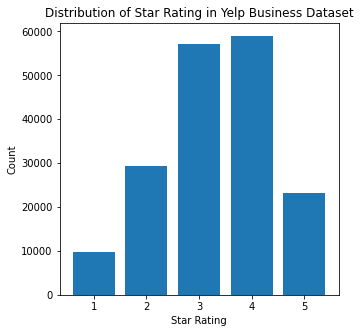

In [9]:
# Plot distribution of target variable
order = ['5.0', '4.5', '4.0', '3.5', '3.0', '2.5', '2.0', '1.5', '1.0']
yelp_clean['star-rating'].value_counts().sort_index().plot(kind='bar', figsize=(5,5), width=0.8)
plt.ylabel('Count')
plt.xlabel('Star Rating')
plt.title('Distribution of Star Rating in Yelp Business Dataset')
plt.xticks(rotation=0)
plt.savefig('../Figures/bar-stars.png', dpi=300)

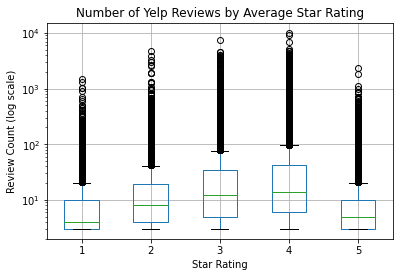

In [10]:
yelp_clean[['review_count','star-rating']].boxplot(by='star-rating')
plt.semilogy()
plt.ylabel('Review Count (log scale)')
plt.xlabel('Star Rating')
plt.title('Number of Yelp Reviews by Average Star Rating')
plt.suptitle('')
plt.savefig('../Figures/review_count_boxplot.png', dpi=300)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


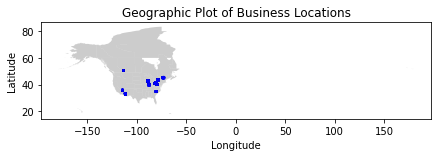

In [18]:
# Plot geographic points of business locations
import geopandas
from shapely.geometry import Point
# https://www.sciencebase.gov/catalog/item/51bf5940e4b0eb321c798ec9
# https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972
geom = [Point(xy) for xy in zip(yelp_clean['longitude'], yelp_clean['latitude'])]
loc_map = geopandas.read_file('../Data/USA_Canada_ShapefileMerge.zip')
crs = {'init': 'epsg:4326'}
geo_df = geopandas.GeoDataFrame(yelp_clean, crs=crs, geometry=geom)
fig,ax = plt.subplots(figsize = (7,7))
loc_map.plot(ax=ax, alpha=0.4, color="grey")
geo_df.plot(ax=ax, markersize=1, color="blue", marker="o", alpha=0.2)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographic Plot of Business Locations')
plt.savefig('../Figures/NA_map.png', dpi=300)

2       53571
1       30416
3        9122
4        1964
None       94
Name: attributes.RestaurantsPriceRange2, dtype: int64


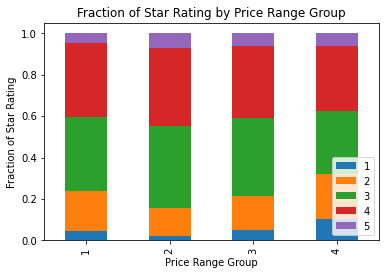

In [16]:
# Plot price range vs. star rating
print(yelp_clean['attributes.RestaurantsPriceRange2'].value_counts())
# Remove None values, create new df; code from EDApt2
price_df = yelp_clean[yelp_clean['attributes.RestaurantsPriceRange2']!='None']
count_matrix = price_df.groupby(['attributes.RestaurantsPriceRange2', 'star-rating']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
#print(count_matrix_norm)
count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('Fraction of Star Rating')
plt.xlabel('Price Range Group')
plt.title('Fraction of Star Rating by Price Range Group')
plt.legend(loc=4)
plt.savefig('../Figures/price-stacked-bar.png', dpi=300)

In [19]:
list(yelp_clean)

['name',
 'review_count',
 'categories',
 'city',
 'state',
 'latitude',
 'longitude',
 'attributes.BYOB',
 'attributes.RestaurantsGoodForGroups',
 'attributes.RestaurantsAttire',
 'attributes.GoodForDancing',
 'attributes.WheelchairAccessible',
 'attributes.RestaurantsTakeOut',
 'attributes.BusinessAcceptsCreditCards',
 'attributes.ByAppointmentOnly',
 'attributes.CoatCheck',
 'attributes.HasTV',
 'attributes.HappyHour',
 'attributes.Smoking',
 'attributes.OutdoorSeating',
 'is_open',
 'attributes.NoiseLevel',
 'attributes.DriveThru',
 'attributes.RestaurantsReservations',
 'attributes.RestaurantsTableService',
 'attributes.RestaurantsPriceRange2',
 'attributes.DogsAllowed',
 'attributes.BusinessAcceptsBitcoin',
 'attributes.Alcohol',
 'attributes.Caters',
 'attributes.WiFi',
 'attributes.BYOBCorkage',
 'attributes.Corkage',
 'attributes.AcceptsInsurance',
 'attributes.BikeParking',
 'star-rating',
 'Monday.hrs.open',
 'Tuesday.hrs.open',
 'Wednesday.hrs.open',
 'Thursday.hrs.open',
 

In [20]:
# Remove name column
del yelp_clean['name']
del yelp_clean['geometry']

In [21]:
# Create custom dummy encoder for categories variable
yelp_clean_dummy = yelp_clean
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
# X_train
yelp_cat = yelp_clean_dummy['categories']
cat_col = []
for row in yelp_cat:
    cat_col.append(row.split(', '))
cat_dummies = pd.DataFrame(mlb.fit_transform(cat_col))
#print(cat_dummies.shape) #shape of dummy transformation
cat_list = list(mlb.classes_) #extract classes as category names
cat_dummies.columns = cat_list #label columns as categories
# Insert new "binarized" columns into df and replace old 'categories' column
del yelp_clean_dummy['categories']
yelp_clean_with_dummies = pd.concat([pd.DataFrame(yelp_clean_dummy).reset_index(drop=True), cat_dummies], axis=1)
print(yelp_clean_with_dummies.shape)
#print(yelp_clean_with_dummies)

(178372, 1370)


In [22]:
# Split the idd data
# Since the data is imbalanced (large number of observations with star rating of 3 & 4),
# we should perform stratified splits to ensure that we get a good number of points from
# each of the target groups.
from sklearn.model_selection import train_test_split 
random_state = 77 #set random state for reproducibility
# Define X and y from yelp_clean
y = yelp_clean_with_dummies['star-rating']
X = yelp_clean_with_dummies.loc[:, (yelp_clean_with_dummies.columns != 'star-rating')]

# Specify categorical columns
cat_cols = ['attributes.RestaurantsPriceRange2','city','state','attributes.BYOB',
   'attributes.RestaurantsGoodForGroups','attributes.RestaurantsAttire',
   'attributes.GoodForDancing','attributes.WheelchairAccessible',
   'attributes.RestaurantsTakeOut','attributes.BusinessAcceptsCreditCards',
   'attributes.ByAppointmentOnly','attributes.CoatCheck','attributes.HasTV',
   'attributes.HappyHour','attributes.Smoking','attributes.OutdoorSeating','is_open',
   'attributes.NoiseLevel','attributes.DriveThru',
   'attributes.RestaurantsReservations','attributes.RestaurantsTableService',
   'attributes.DogsAllowed','attributes.BusinessAcceptsBitcoin',
   'attributes.Alcohol','attributes.Caters','attributes.WiFi',
   'attributes.BYOBCorkage','attributes.Corkage','attributes.AcceptsInsurance',
   'attributes.BikeParking']
# Fill missing data in categorical columns with another category 'missing'
X[cat_cols] = X[cat_cols].fillna(value='missing', axis=0)
# Convert categorical column values to str type
X[cat_cols] = X[cat_cols].astype(str)
# Stratified split of data: 80/10/10
X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.8,stratify=y,random_state=random_state)
X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5,stratify=y_other,random_state=random_state)
print(y_train.value_counts(normalize=True))
print(y_val.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:3636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


4    0.330673
3    0.319881
2    0.164734
5    0.129463
1    0.055250
Name: star-rating, dtype: float64
4    0.330661
3    0.319841
2    0.164714
5    0.129506
1    0.055278
Name: star-rating, dtype: float64
4    0.330699
3    0.319879
2    0.164761
5    0.129443
1    0.055219
Name: star-rating, dtype: float64


In [23]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(142697, 1369)
(17837, 1369)
(17838, 1369)


In [24]:
# Preprocess X_train, X_val, and X_test
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
np.random.seed(77)
# Collect types of features
ordinal_fts = ['attributes.RestaurantsPriceRange2']
ordinal_cats = [['missing','None','1','2','3','4']]
onehot_fts = ['city','state','attributes.BYOB','attributes.RestaurantsGoodForGroups',
              'attributes.RestaurantsAttire','attributes.GoodForDancing',
              'attributes.WheelchairAccessible','attributes.RestaurantsTakeOut',
              'attributes.BusinessAcceptsCreditCards','attributes.ByAppointmentOnly',
              'attributes.CoatCheck','attributes.HasTV','attributes.HappyHour',
              'attributes.Smoking','attributes.OutdoorSeating','is_open',
              'attributes.NoiseLevel','attributes.DriveThru',
              'attributes.RestaurantsReservations','attributes.RestaurantsTableService',
              'attributes.DogsAllowed','attributes.BusinessAcceptsBitcoin',
              'attributes.Alcohol','attributes.Caters','attributes.WiFi',
              'attributes.BYOBCorkage','attributes.Corkage','attributes.AcceptsInsurance',
              'attributes.BikeParking']
# Don't include already-preprocessed columns in cat_list
minmax_fts = ['latitude','longitude','Monday.hrs.open','Tuesday.hrs.open',
              'Wednesday.hrs.open','Thursday.hrs.open','Friday.hrs.open',
             'Saturday.hrs.open','Sunday.hrs.open']
std_fts = ['review_count']
# Collect encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories = ordinal_cats), ordinal_fts),
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_fts),
        ('minmax', MinMaxScaler(), minmax_fts),
        ('std', StandardScaler(), std_fts)])
clf = Pipeline(steps=[('preprocessor', preprocessor)])
X_train_prep = clf.fit_transform(X_train) #X_train.loc[:, (X_train.columns != 'categories')]
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)
print(X_train_prep.shape)
print(X_val_prep.shape)
print(X_test_prep.shape)
# Outputs all preprocessed columns OTHER THAN cat_list

(142697, 1196)
(17837, 1196)
(17838, 1196)


In [25]:
print(X_train[cat_list].shape)
print(type(X_train_prep))
print(type(X_train[cat_list]))

(142697, 1329)
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>


In [26]:
# Concatenate training, validation, and testing sets from the Pipeline with the
# custom one-hot encoded array represent the 'categories' feature.
X_train_prep_final = pd.concat([pd.DataFrame(X_train_prep).reset_index(drop=True), 
                                X_train[cat_list].reset_index(drop=True)], axis=1)
X_val_prep_final = pd.concat([pd.DataFrame(X_val_prep).reset_index(drop=True), 
                                X_val[cat_list].reset_index(drop=True)], axis=1)
X_test_prep_final = pd.concat([pd.DataFrame(X_test_prep).reset_index(drop=True), 
                                X_test[cat_list].reset_index(drop=True)], axis=1)
# Column names of left df are dropped, need to add in later
print(X_train_prep_final.shape)
print(X_val_prep_final.shape)
print(X_test_prep_final.shape)

(142697, 2525)
(17837, 2525)
(17838, 2525)
